In [25]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib
import mlflow
import os

from sklearn.metrics import (
    classification_report, 
    confusion_matrix,
)

from dotenv import load_dotenv
load_dotenv()

True

In [2]:
tf.__version__

'2.18.0'

# Load Resources

In [3]:
test_ds_path = "../../datasets/CLEAN_NWPU-RESISC45-SAMPLE500-SPLITTED8515/test"

## Loading Models and Histories

In [4]:
models = {
    "base_resnet50v2": "resnet50v2_15/base_resnet50v2_15_epoch0015.keras",
    "aug_resnet50v2": "resnet50v2_15/aug_resnet50v2_15_epoch0015.keras",
    
    "base_convnext-tiny": "convnexttiny_15/base_convnext-tiny_15_epoch0015.keras",
    "aug_convnext-tiny": "convnexttiny_15/aug_convnext-tiny_15_epoch0015.keras",
}

histories = {
    "history_base_resnet50v2": "resnet50v2_15/history_base_resnet50v2_15.joblib",
    "history_aug_resnet50v2": "resnet50v2_15/history_aug_resnet50v2_15.joblib",
    
    "history_base_convnext-tiny": "convnexttiny_15/history_base_convnext-tiny_15.joblib",
    "history_aug_convnext-tiny": "convnexttiny_15/history_aug_convnext-tiny_15.joblib",
}

# Load Models
for x in models.keys():
    models[x] = tf.keras.models.load_model(os.path.join("../../outputs/models/", models[x]))
    
# Load Histories
for x in histories.keys():
    histories[x] = joblib.load(os.path.join("../../outputs/histories/", histories[x]))
    
models

I0000 00:00:1754926774.905100    7505 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5563 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


{'base_resnet50v2': <Functional name=base_resnet50v2_15, built=True>,
 'aug_resnet50v2': <Functional name=aug_resnet50v2_15, built=True>,
 'base_convnext-tiny': <Functional name=base_convnext-tiny_15, built=True>,
 'aug_convnext-tiny': <Functional name=aug_convnext-tiny_15, built=True>}

In [5]:
img_size = (224, 224)
batch_size = 10

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory = test_ds_path,
    shuffle = False,
    image_size = img_size,
    batch_size=batch_size
)

classes = test_ds.class_names
print(f"""
Class names: {classes}
Len data within each batch: {len(test_ds)}
""")

Found 3375 files belonging to 45 classes.

Class names: ['airplane', 'airport', 'baseball_diamond', 'basketball_court', 'beach', 'bridge', 'chaparral', 'church', 'circular_farmland', 'cloud', 'commercial_area', 'dense_residential', 'desert', 'forest', 'freeway', 'golf_course', 'ground_track_field', 'harbor', 'industrial_area', 'intersection', 'island', 'lake', 'meadow', 'medium_residential', 'mobile_home_park', 'mountain', 'overpass', 'palace', 'parking_lot', 'railway', 'railway_station', 'rectangular_farmland', 'river', 'roundabout', 'runway', 'sea_ice', 'ship', 'snowberg', 'sparse_residential', 'stadium', 'storage_tank', 'tennis_court', 'terrace', 'thermal_power_station', 'wetland']
Len data within each batch: 338



In [6]:
rescaling_layer = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
])

test_ds = test_ds.map(lambda x, y: (rescaling_layer(x), y))

# Evaluation

## Loss and Acc

In [7]:
def model_eval(model_name, name):
    loss, acc = model_name.evaluate(test_ds, verbose=0)
    print(f"### eval result of {name} ####\nTest Loss: {loss}\nTest Acc: {acc}")
    return loss, acc

In [8]:
loss_base_resnet50v2, acc_base_resnet50v2 = model_eval(models["base_resnet50v2"], name="base_resnet50v2")
loss_aug_resnet50v2, acc_aug_resnet50v2 = model_eval(models["aug_resnet50v2"], name="aug_resnet50v2")
loss_base_convnext_tiny, acc_base_convnext_tiny = model_eval(models["base_convnext-tiny"], name="base_convnext-tiny")
loss_aug_convnext_tiny, acc_aug_convnext_tiny = model_eval(models["aug_convnext-tiny"], name="aug_convnext-tiny")

I0000 00:00:1754926786.862614    7645 service.cc:148] XLA service 0x7b6380015470 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1754926786.863067    7645 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2025-08-11 22:39:47.021046: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1754926787.375241    7645 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-08-11 22:39:47.936396: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1497_0', 8 bytes spill stores, 8 bytes spill loads

2025-08-11 22:39:48.949934: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1518

### eval result of base_resnet50v2 ####
Test Loss: 0.4513690173625946
Test Acc: 0.8962963223457336
### eval result of aug_resnet50v2 ####
Test Loss: 0.35287678241729736
Test Acc: 0.9105185270309448


2025-08-11 22:40:19.109664: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot', 116 bytes spill stores, 116 bytes spill loads

2025-08-11 22:40:19.126086: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot', 76 bytes spill stores, 76 bytes spill loads

2025-08-11 22:40:19.167841: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot', 56 bytes spill stores, 56 bytes spill loads

2025-08-11 22:40:19.612850: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_6', 280 bytes spill stores, 260 bytes spill loads

2025-08-11 22:40:19.770798: I external/local_xla/xla/stream_executor/cuda/

### eval result of base_convnext-tiny ####
Test Loss: 0.34889546036720276
Test Acc: 0.9182222485542297
### eval result of aug_convnext-tiny ####
Test Loss: 0.28922560811042786
Test Acc: 0.9170370101928711


## Predicitons

In [9]:
y_true = np.concatenate([label.numpy() for _, label in test_ds])
len(y_true)

2025-08-11 22:40:53.707162: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


3375

In [10]:
### RESNET50-V2
base_resnet50v2_preds = tf.nn.softmax(models["base_resnet50v2"].predict(test_ds), axis=-1)
base_resnet50v2_preds_labels = np.argmax(base_resnet50v2_preds, axis=-1)

aug_resnet50v2_preds = tf.nn.softmax(models["aug_resnet50v2"].predict(test_ds), axis=-1)
aug_resnet50v2_preds_labels = np.argmax(aug_resnet50v2_preds, axis=-1)

### CONVNEXT-TINY
base_convnextiny_preds = tf.nn.softmax(models["base_convnext-tiny"].predict(test_ds), axis=-1)
base_convnextiny_preds_labels = np.argmax(base_convnextiny_preds, axis=-1)

aug_convnextiny_preds = tf.nn.softmax(models["aug_convnext-tiny"].predict(test_ds), axis=-1)
aug_convnextiny_preds_labels = np.argmax(aug_convnextiny_preds, axis=-1)

338/338 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step
338/338 ━━━━━━━━━━━━━━━━━━━━ 12s 26ms/step
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 33ms/step
338/338 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step


## Classification Report

In [11]:
resnet50v2_aug_clfreport = classification_report(base_resnet50v2_preds_labels, y_true, target_names=classes, output_dict=True)
resnet50v2_base_clfreport = classification_report(aug_resnet50v2_preds_labels, y_true, target_names=classes, output_dict=True)


convnexttiny_base_clfreport = classification_report(base_convnextiny_preds_labels, y_true, target_names=classes, output_dict=True)
convnexttiny_aug_clfreport = classification_report(aug_convnextiny_preds_labels, y_true, target_names=classes, output_dict=True)

## Confussion Matrix Each Model

In [12]:
def plot_cm(y_pred, y_true, model_name):
    plt.figure(figsize=(15, 10))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt="d", xticklabels=classes, yticklabels=classes, cmap="Blues")
    plt.ylabel("True Class")
    plt.xlabel("Predicted Class")
    plt.title(f'Confusion Matrix of {model_name} Performance')
    plt.show()

### ResNet-50 V2

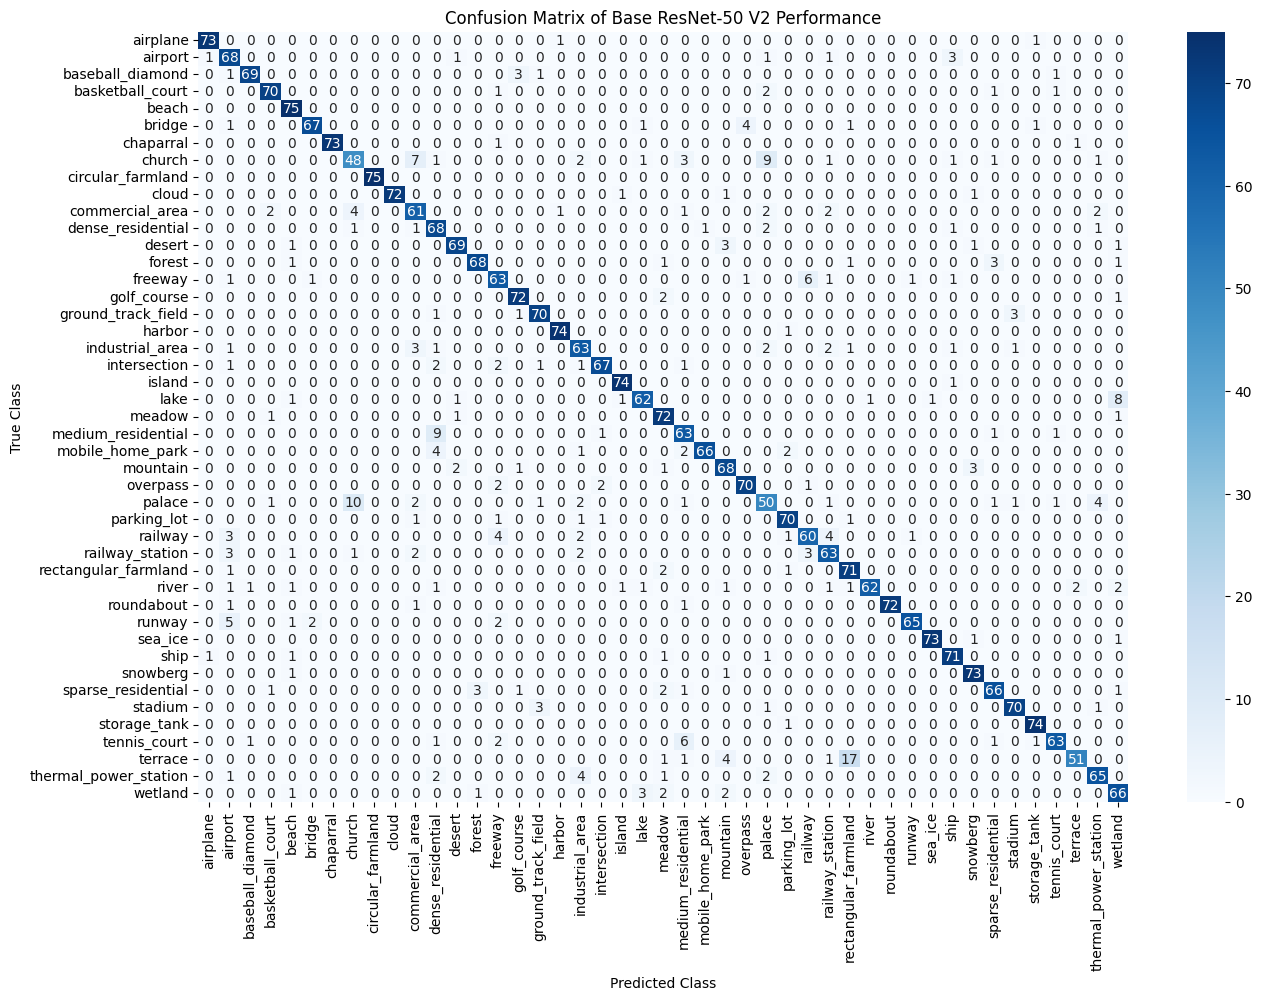

In [13]:
plot_cm(base_resnet50v2_preds_labels, y_true, "Base ResNet-50 V2")

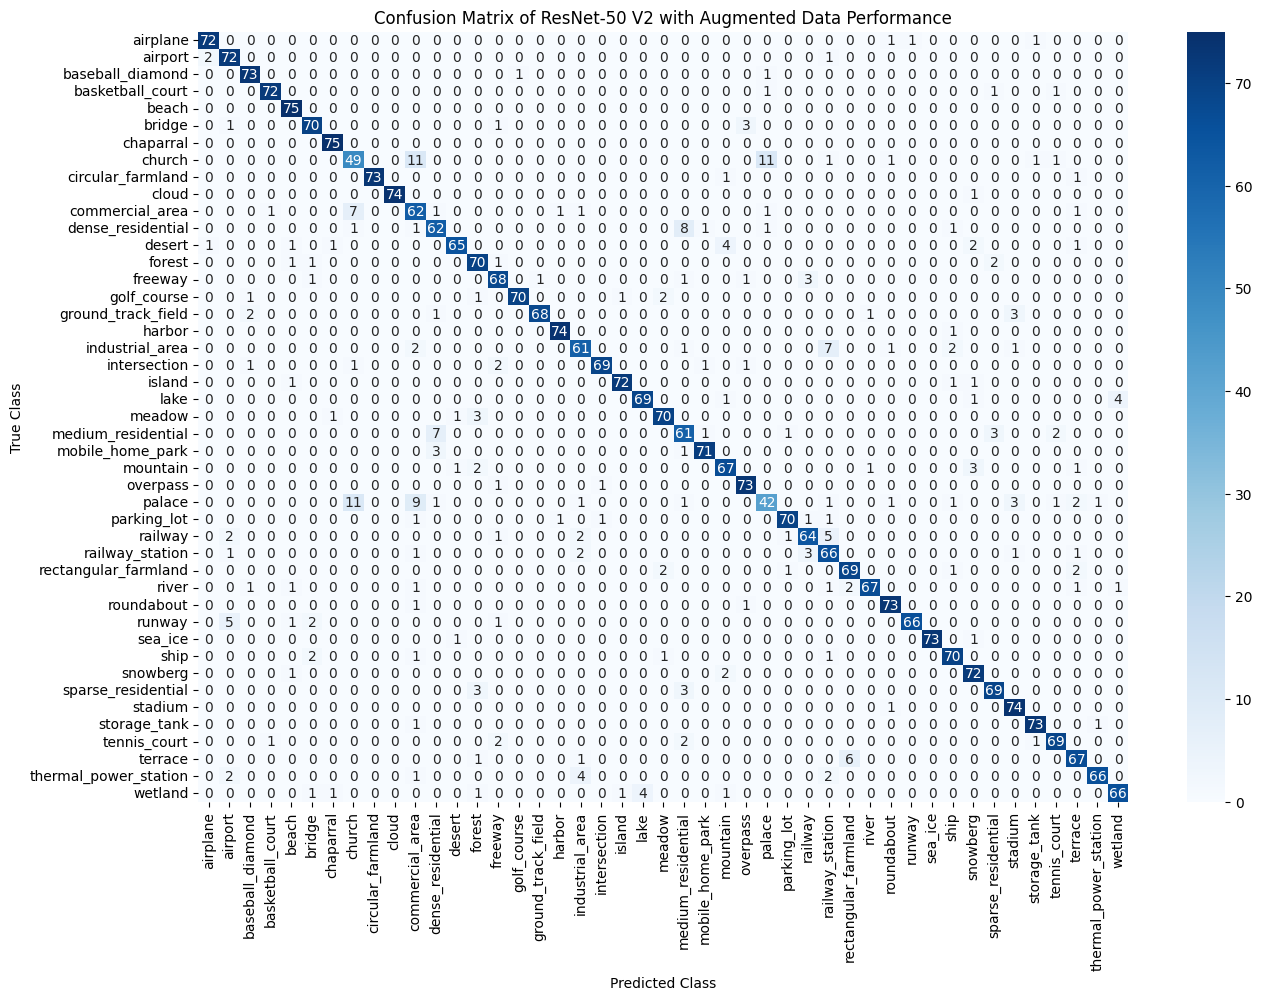

In [14]:
plot_cm(aug_resnet50v2_preds_labels, y_true, "ResNet-50 V2 with Augmented Data")

## ConvNeXt Tiny 

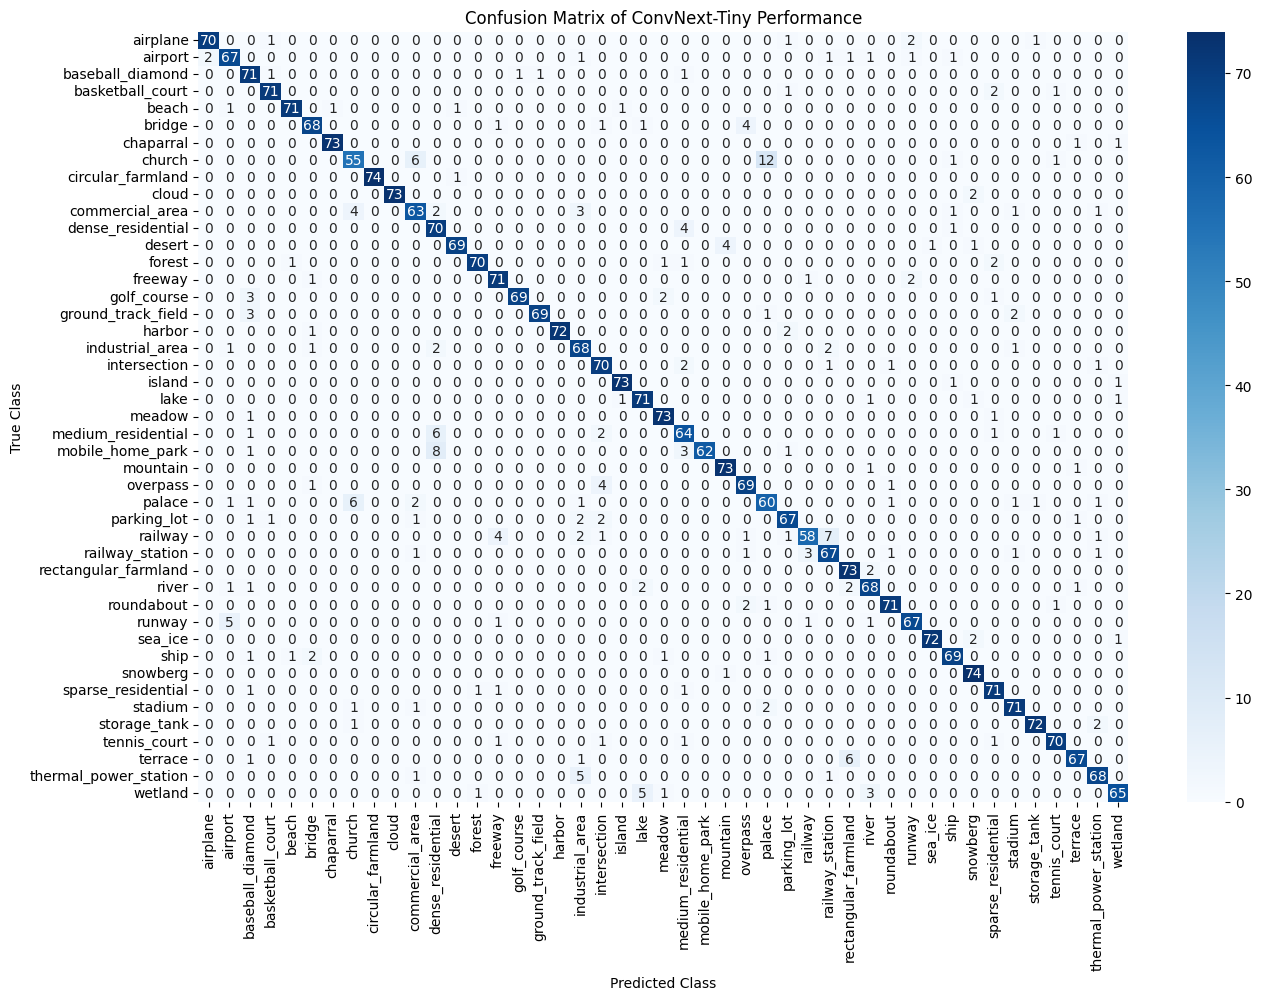

In [15]:
plot_cm(base_convnextiny_preds_labels, y_true, "ConvNext-Tiny")

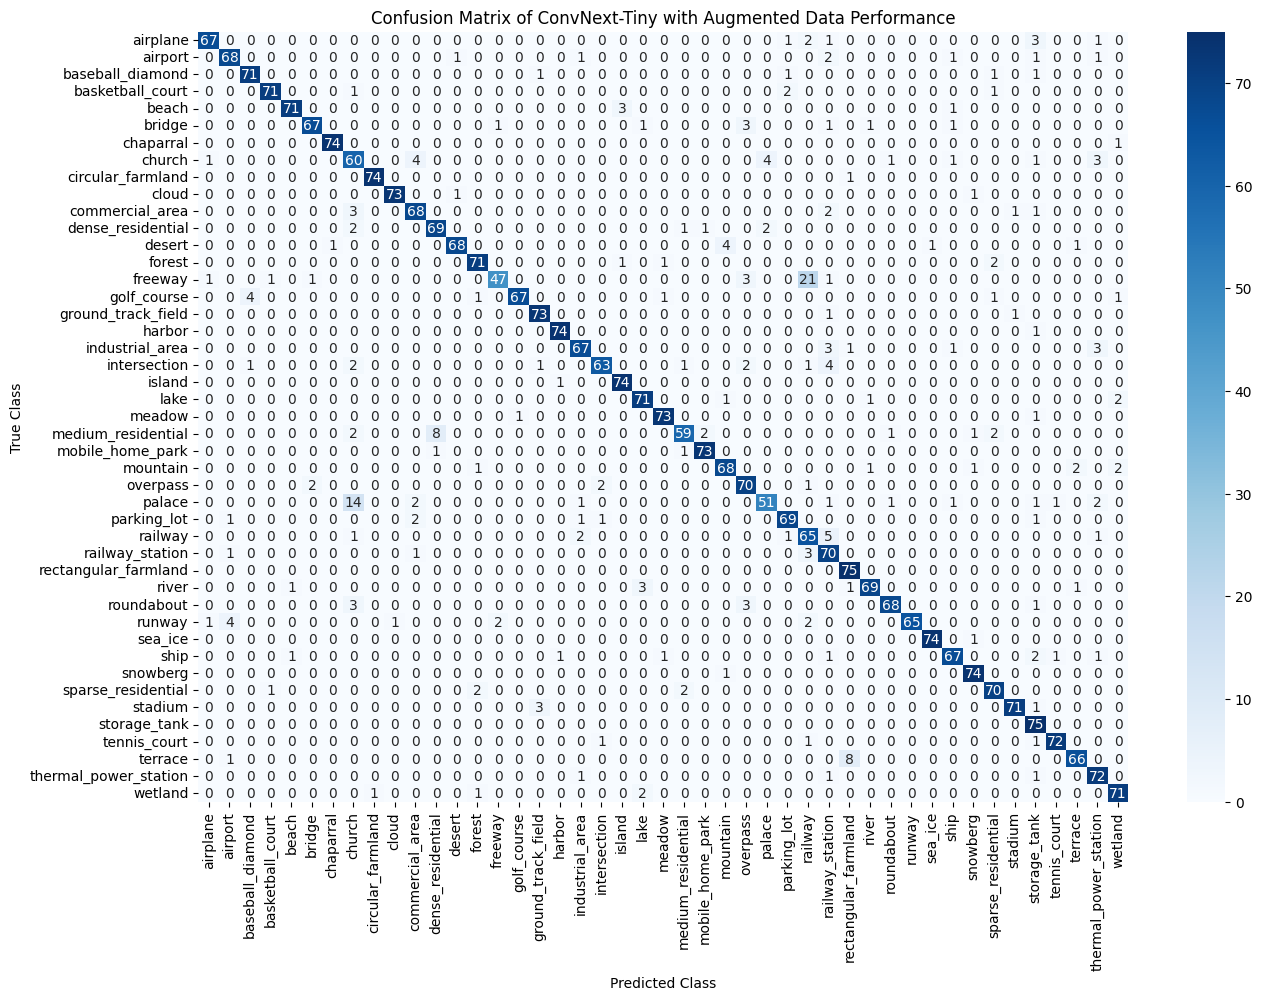

In [16]:
plot_cm(aug_convnextiny_preds_labels, y_true, "ConvNext-Tiny with Augmented Data")

# Deploy to MLFlow Tracking

In [17]:
models

{'base_resnet50v2': <Functional name=base_resnet50v2_15, built=True>,
 'aug_resnet50v2': <Functional name=aug_resnet50v2_15, built=True>,
 'base_convnext-tiny': <Functional name=base_convnext-tiny_15, built=True>,
 'aug_convnext-tiny': <Functional name=aug_convnext-tiny_15, built=True>}

In [18]:
model_acc = [acc_base_resnet50v2, acc_aug_resnet50v2, acc_base_convnext_tiny, acc_aug_convnext_tiny]
model_clfreport = [resnet50v2_aug_clfreport, resnet50v2_base_clfreport, convnexttiny_base_clfreport, convnexttiny_aug_clfreport]

model_acc_f = {
    name: model_acc[i] for i, name in enumerate(models.keys())
}

model_clfreport_f = {
    name: model_clfreport[i] for i, name in enumerate(models.keys())
}

In [19]:
X_test = []
y_test = []

for x, y in test_ds.take(1):
    X_test.append(x.numpy())
    y_test.append(y.numpy())
        
X_test = np.concatenate(X_test)
y_test = np.concatenate(y_test)

len(X_test), len(y_test)

2025-08-11 22:41:55.281874: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


(10, 10)

In [20]:
histories_f = {
    list(models.keys())[i]: val for i, val in enumerate(histories.values())
}

In [32]:
mlflow.set_tracking_uri("http://localhost:8080/")
mlflow.set_experiment(os.getenv("EXPERIMENT_NAME"))

for model_name in models:
    with mlflow.start_run(run_name=f"log_{model_name}"):
        
        # ========= TRAINING HISTORY
        epochs=15
        for i, acc in enumerate(histories_f[model_name]["accuracy"]):
            mlflow.log_metric("train_accuracy", acc, step=i)
        
        for i, val_acc in enumerate(histories_f[model_name]["val_accuracy"]):
            mlflow.log_metric("train_val_accuracy", val_acc, step=i)
        
        
        # ========= LOG ACCURACY
        mlflow.log_metric("accuracy", model_acc_f[model_name])
        
        
        # ========= MODEL SIGNATURE        
        X_test_sample = X_test[:1]
        if isinstance(X_test_sample, tf.Tensor):
            X_test_sample = X_test_sample.numpy()
        
        y_pred_sample = y_preds_prob[:1]
        if isinstance(y_pred_sample, tf.Tensor):
            y_pred_sample = y_pred_sample.numpy()
            
        signature = mlflow.models.signature.infer_signature(X_test_sample, y_pred_sample)
        
        
        # ========= AVG N MACRO
        for avg_type in ["macro avg", "weighted avg"]:
            for metric_name, val in model_clfreport_f[model_name][avg_type].items():
                if metric_name != "support":
                    mlflow.log_metric(
                        f"{avg_type.replace(' ', '_')}_{metric_name}", 
                        val
                    )
        
                    
        # ========= Metrics perClass
        for class_name in classes:
            metrics = model_clfreport_f[model_name][class_name]
            for metric_name, value in metrics.items():
                if metric_name != "support":
                    mlflow.log_metric(
                        f"class_{class_name}_{metric_name}", 
                        value
                    )
                
                    
        # ========= MODEL ARTIFACT
        mlflow.tensorflow.log_model(
            models[model_name],
            artifact_path="model",
            signature=signature,
            registered_model_name=f"{model_name}_rssc"
        )

        
        print(f"Logged MLflow Run for: {model_name}")

2025/08/12 03:18:39 INFO mlflow.tracking.fluent: Experiment with name 'RSSC' does not exist. Creating a new experiment.
Successfully registered model 'base_resnet50v2_rssc'.
2025/08/12 03:28:03 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: base_resnet50v2_rssc, version 1
Created version '1' of model 'base_resnet50v2_rssc'.


Logged MLflow Run for: base_resnet50v2
🏃 View run log_base_resnet50v2 at: http://localhost:8080/#/experiments/1/runs/c9378a7f9fe7477394c320cfd26ff4cb
🧪 View experiment at: http://localhost:8080/#/experiments/1


Successfully registered model 'aug_resnet50v2_rssc'.
2025/08/12 03:38:14 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: aug_resnet50v2_rssc, version 1
Created version '1' of model 'aug_resnet50v2_rssc'.


Logged MLflow Run for: aug_resnet50v2
🏃 View run log_aug_resnet50v2 at: http://localhost:8080/#/experiments/1/runs/8d8ff1f4f8044a9cadd15cfe86acd697
🧪 View experiment at: http://localhost:8080/#/experiments/1


Successfully registered model 'base_convnext-tiny_rssc'.
2025/08/12 03:47:18 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: base_convnext-tiny_rssc, version 1
Created version '1' of model 'base_convnext-tiny_rssc'.


Logged MLflow Run for: base_convnext-tiny
🏃 View run log_base_convnext-tiny at: http://localhost:8080/#/experiments/1/runs/10b2a04c54254d8ea4a87b0d7b39054e
🧪 View experiment at: http://localhost:8080/#/experiments/1


Successfully registered model 'aug_convnext-tiny_rssc'.
2025/08/12 03:57:49 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: aug_convnext-tiny_rssc, version 1
Created version '1' of model 'aug_convnext-tiny_rssc'.


Logged MLflow Run for: aug_convnext-tiny
🏃 View run log_aug_convnext-tiny at: http://localhost:8080/#/experiments/1/runs/50d5a88b9e3641c6a57fd439a4ee2dcd
🧪 View experiment at: http://localhost:8080/#/experiments/1
